# 📊 Data Analytics Challenge - Decentraland Foundation

<p align="center">
  <img src="https://cryptologos.cc/logos/decentraland-mana-logo.svg?v=040" alt="Decentraland Logo" width="150">
</p>

## Library Loading

Load all necessary libraries for the analysis.

In [1]:
import pandas as pd
import requests
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import folium
from folium.plugins import HeatMap, MarkerCluster
from folium import Icon

## Dataset Loading

Load the datasets that will be used throughout the analysis.

In [2]:
#Main urls
url_users_2024 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios_ecobici_2024.csv"
url_bike_stations = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/estaciones-bicicletas-publicas/nuevas-estaciones-bicicletas-publicas.csv"
url_mecanical_points = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/estaciones-bicicletas-publicas/mecanica-sencilla.csv"
zip_url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/recorridos-realizados-2024.zip"

In [37]:
url_users_2023 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios_ecobici_2023.csv"
url_users_2022 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios_ecobici_2022.csv"
url_users_2021 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios_ecobici_2021.csv"
url_users_2020 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios_ecobici_2020.csv"
url_users_2019 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios_ecobici_2019.csv"
url_users_2018 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios-ecobici-2018.csv"
url_users_2017 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios-ecobici-2017.csv"
url_users_2016 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios-ecobici-2016.csv"
url_users_2015 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/usuarios-ecobici-2015.csv"

In [3]:
#Main dfs
df_bike_stations = pd.read_csv(url_bike_stations, encoding="utf-8")
df_mecanical_points = pd.read_csv(
    url_mecanical_points,
    sep=';',
    on_bad_lines='skip'
)

In [61]:
df_users_2024 = pd.read_csv(url_users_2024, dtype={2: str}, encoding="utf-8")
df_users_2023 = pd.read_csv(url_users_2023, dtype={2: str}, encoding="utf-8")
df_users_2022 = pd.read_csv(url_users_2022, dtype={2: str}, encoding="utf-8")
df_users_2021 = pd.read_csv(url_users_2021, dtype={2: str}, encoding="utf-8")
df_users_2020 = pd.read_csv(url_users_2020, dtype={2: str}, encoding="utf-8")
df_users_2019 = pd.read_csv(url_users_2019, dtype={2: str}, encoding="utf-8")
df_users_2018 = pd.read_csv(url_users_2018, dtype={2: str}, encoding="utf-8")
df_users_2017 = pd.read_csv(url_users_2017, dtype={2: str}, encoding="utf-8")
df_users_2016 = pd.read_csv(url_users_2016, dtype={2: str}, encoding="utf-8")
df_users_2015 = pd.read_csv(url_users_2015, dtype={2: str}, encoding="utf-8")

In [65]:
# Rename the "ID Cliente" column to "id_usuario" in df_users_2024
df_users_2024.rename(columns={"ID Cliente": "id_usuario"}, inplace=True)

# Create a list of DataFrames to process (including 2024 if needed)
dfs = [df_users_2024, df_users_2023, df_users_2022, df_users_2021, 
       df_users_2020, df_users_2019, df_users_2018, df_users_2017, 
       df_users_2016, df_users_2015]

# Convert all column names to lowercase for consistency
for df in dfs:
    df.columns = df.columns.str.lower()

for df in dfs:
    if 'genero_usuario' in df.columns:
        df['genero_usuario'] = (
            df['genero_usuario']
            .astype(str)
            .str.strip()
            .str.upper()
            .replace({'M': 'MALE', 'F': 'FEMALE', 'O': 'OTHER'})
        )

# Specify the columns to keep
selected_columns = ['id_usuario', 'genero_usuario', 'edad_usuario', 'fecha_alta']

# Filter each DataFrame to include only the selected columns (if they exist)
dfs_selected = [df[selected_columns] for df in dfs if set(selected_columns).issubset(df.columns)]

# Concatenate all the DataFrames into one
df_users_all = pd.concat(dfs_selected, ignore_index=True)

   id_usuario genero_usuario edad_usuario  fecha_alta
0     1280596           MALE           26  2024-12-31
1     1280263           MALE           33  2024-12-31
2     1280151          OTHER           27  2024-12-31
3     1280499          OTHER           36  2024-12-31
4     1280446         FEMALE           33  2024-12-31
Total number of records: 905767


In [4]:
try:
    # Download the ZIP file into memory
    response = requests.get(zip_url, stream=True)
    response.raise_for_status()  # Raise an error if the download fails

    # Load the ZIP file into memory and list its contents
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        file_list = zip_file.namelist()

        # Filter only CSV files inside the ZIP
        csv_files = [f for f in file_list if f.endswith(".csv")]

        if not csv_files:
            raise ValueError("No CSV files found in the ZIP.")

        # Select the first CSV file
        csv_filename = csv_files[0]

        # Extract and read the CSV directly into a DataFrame
        with zip_file.open(csv_filename) as file:
            df_trips = pd.read_csv(file)

    # Display dataset summary
    print(f"✅ File loaded: {csv_filename}")

except requests.exceptions.RequestException as e:
    print(f"❌ Download error: {e}")
except zipfile.BadZipFile:
    print("❌ The downloaded file is not a valid ZIP.")
except Exception as e:
    print(f"❌ Unexpected error: {e}")

/tmp/ipykernel_4430/469464583.py:21: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trips = pd.read_csv(file)


✅ File loaded: recorridos_realizados_2024.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935484 entries, 0 to 2935483
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Id_recorrido                object 
 1   duracion_recorrido          object 
 2   fecha_origen_recorrido      object 
 3   id_estacion_origen          object 
 4   nombre_estacion_origen      object 
 5   direccion_estacion_origen   object 
 6   long_estacion_origen        float64
 7   lat_estacion_origen         float64
 8   fecha_destino_recorrido     object 
 9   id_estacion_destino         object 
 10  nombre_estacion_destino     object 
 11  direccion_estacion_destino  object 
 12  long_estacion_destino       float64
 13  lat_estacion_destino        float64
 14  id_usuario                  object 
 15  modelo_bicicleta            object 
 16  género                      object 
dtypes: float64(4), object(13)
memory usage: 380.7+ MB
None
  

In [68]:
df_trips['id_usuario'] = df_trips['id_usuario'].str.replace("BAEcobici", "", regex=False)

## 1. Trending Stations
- Define and identify the most trending stations.

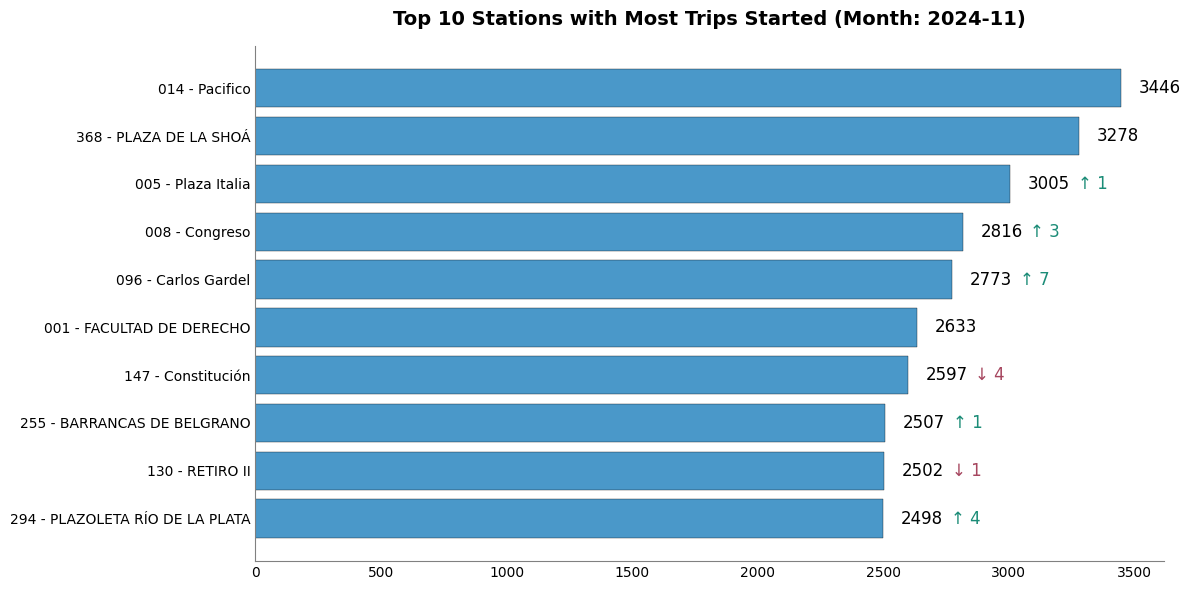

In [114]:
# Convert the start date column to datetime format
df_trips['fecha_origen_recorrido'] = pd.to_datetime(df_trips['fecha_origen_recorrido'])

# Use the maximum date in the dataset as the reference (data is from 2024)
reference_date = df_trips['fecha_origen_recorrido'].max()
ref_year = reference_date.year
ref_month = reference_date.month

# Filter trips for the current month (the month of the reference date)
df_current = df_trips[(df_trips['fecha_origen_recorrido'].dt.year == ref_year) &
                      (df_trips['fecha_origen_recorrido'].dt.month == ref_month)]

# Count the number of trips started per station for the current month
current_counts = df_current['nombre_estacion_origen'].value_counts().reset_index()
current_counts.columns = ['Station', 'Trips Started']
# Calculate the current rank (1 = highest number of trips)
current_counts['Current Rank'] = current_counts['Trips Started'].rank(method='min', ascending=False).astype(int)

# Determine the previous month relative to the reference date
if ref_month == 1:
    prev_year = ref_year - 1
    prev_month = 12
else:
    prev_year = ref_year
    prev_month = ref_month - 1

# Filter trips for the previous month
df_prev = df_trips[(df_trips['fecha_origen_recorrido'].dt.year == prev_year) &
                   (df_trips['fecha_origen_recorrido'].dt.month == prev_month)]

# Count the number of trips started per station for the previous month
prev_counts = df_prev['nombre_estacion_origen'].value_counts().reset_index()
prev_counts.columns = ['Station', 'Trips Started']
# Calculate the previous rank (1 = highest)
prev_counts['Previous Rank'] = prev_counts['Trips Started'].rank(method='min', ascending=False).astype(int)

# Merge current and previous counts to align rankings by station
merged_counts = pd.merge(current_counts, prev_counts[['Station', 'Previous Rank']], on='Station', how='left')

# Calculate the rank change: (Previous Rank - Current Rank)
merged_counts['Rank Change'] = merged_counts['Previous Rank'] - merged_counts['Current Rank']

# Select the top 10 stations based on current month trips and sort them in descending order
top10 = merged_counts.sort_values(by='Trips Started', ascending=False).head(10)
# Sort for horizontal bar chart (so that the highest value appears at the top)
top10_plot = top10.sort_values(by="Trips Started", ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(top10_plot["Station"], top10_plot["Trips Started"], color="#4A98C9", edgecolor="black", linewidth=0.25)
# (Axis titles are removed)
plt.title("Top 10 Stations with Most Trips Started (Month: {}-{})".format(ref_year, ref_month),
          fontsize=14, fontweight="bold", pad=15, color="black")

# Customize axis lines: set bottom and left spines to gray
ax = plt.gca()
ax.spines["bottom"].set_color("gray")
ax.spines["left"].set_color("gray")
# Configure tick labels and tick lines
ax.tick_params(axis="x", colors="black", direction="out", length=0, width=1, grid_color="gray")
ax.tick_params(axis="y", colors="black", direction="out", length=0, width=1, grid_color="gray")
# Remove top and right spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Annotation offsets (adjusted to avoid overlap)
base_offset = 70   # offset for the trips count (in black)
arrow_offset = 100  # additional offset for the arrow annotation

# Loop through the rows using enumerate for proper y-positioning
for i, (_, row) in enumerate(top10_plot.iterrows()):
    trips_val = row["Trips Started"]
    # Build the base label showing the trips count in black (without the pipe)
    base_label = f"{trips_val}"
    arrow_label = ""
    # Check for rank change; if nonzero, create arrow label
    if pd.notna(row['Rank Change']) and row['Rank Change'] != 0:
        if row['Rank Change'] > 0:
            arrow_label = f"↑ {int(row['Rank Change'])}"
            arrow_color = "#1B8C77"  # green
        else:
            arrow_label = f"↓ {abs(int(row['Rank Change']))}"
            arrow_color = "#A6465F"  # red
    # Place the base label in black
    plt.text(trips_val + base_offset, i, base_label, fontsize=12, verticalalignment="center", color="black")
    # If an arrow label exists, place it further to the right with its designated color
    if arrow_label:
        plt.text(trips_val + base_offset + arrow_offset + 100, i, arrow_label, fontsize=12, verticalalignment="center", color=arrow_color)

plt.tight_layout()
plt.show()



To identify trending stations, we specifically visualized changes in the ranking of stations with the highest number of trips by comparing the last month of available data to the previous month. This approach helps highlight which stations are gaining or losing popularity, allowing us to see subtle shifts in rider behavior.

## 2. Start vs. Finish Trends 
- Do the most trending stations differ between starting and finishing locations?

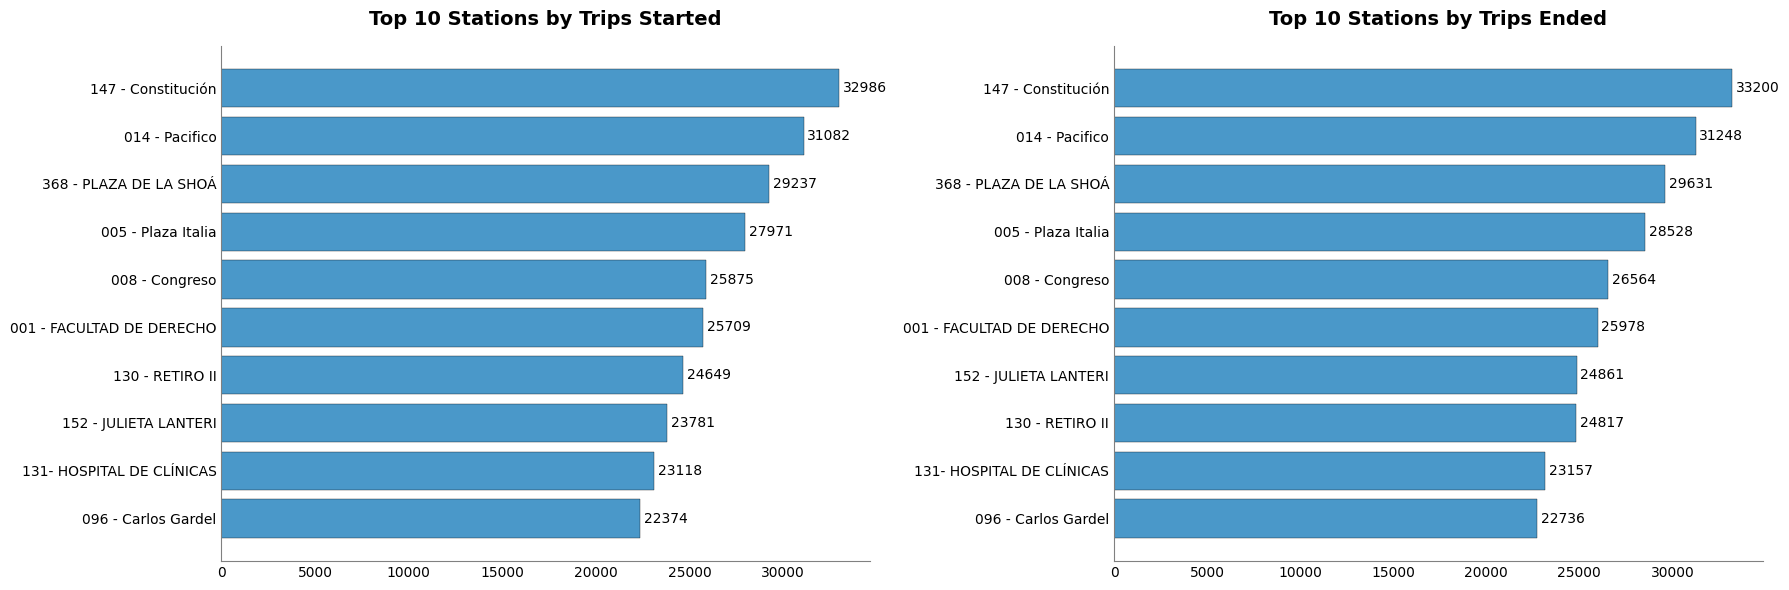

In [113]:
# Convert the start date column to datetime format
df_trips['fecha_origen_recorrido'] = pd.to_datetime(df_trips['fecha_origen_recorrido'])

# Create a figure with two subplots side by side without sharing the y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=False)

# Graph 1: Top 10 Origin Stations (Ordered from Highest to Lowest)
top_origin_stations = df_trips["nombre_estacion_origen"].value_counts().reset_index()
top_origin_stations.columns = ["Station", "Trips Started"]
# Sorting in ascending order so that the highest value is last (appearing at the top)
top_10_origin = top_origin_stations.head(10).sort_values(by="Trips Started", ascending=True)

axes[0].barh(top_10_origin["Station"], top_10_origin["Trips Started"], color="#4A98C9", edgecolor="black", linewidth=0.25)
# Remove axis labels
# axes[0].set_xlabel("Number of Trips Started", fontsize=12, fontweight="bold", color="black")
# axes[0].set_ylabel("Station", fontsize=12, fontweight="bold", color="black")
axes[0].set_title("Top 10 Stations by Trips Started", fontsize=14, fontweight="bold", pad=15, color="black")
# No need to invert the y-axis

# Change axis line colors to gray
axes[0].spines["bottom"].set_color("gray")
axes[0].spines["left"].set_color("gray")

# Keep tick labels in black but set tick lines in gray
axes[0].tick_params(axis="x", colors="black", direction="out", length=0, width=1, grid_color="gray")
axes[0].tick_params(axis="y", colors="black", direction="out", length=0, width=1, grid_color="gray")

# Remove unnecessary chart borders
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

# Display values on bars
for index, value in enumerate(top_10_origin["Trips Started"]):
    axes[0].text(value + 200, index, str(value), fontsize=10, verticalalignment="center", color="black")

# Graph 2: Top 10 Destination Stations (Ordered from Highest to Lowest)
top_destination_stations = df_trips["nombre_estacion_destino"].value_counts().reset_index()
top_destination_stations.columns = ["Station", "Trips Ended"]
# Sorting in ascending order so that the highest value is last (appearing at the top)
top_10_dest = top_destination_stations.head(10).sort_values(by="Trips Ended", ascending=True)

axes[1].barh(top_10_dest["Station"], top_10_dest["Trips Ended"], color="#4A98C9", edgecolor="black", linewidth=0.25)
# Remove axis label for x-axis (y-axis label is not set)
# axes[1].set_xlabel("Number of Trips Ended", fontsize=12, fontweight="bold", color="black")
axes[1].set_title("Top 10 Stations by Trips Ended", fontsize=14, fontweight="bold", pad=15, color="black")
# No need to invert the y-axis

# Change axis line colors to gray
axes[1].spines["bottom"].set_color("gray")
axes[1].spines["left"].set_color("gray")

# Keep tick labels in black but set tick lines in gray
axes[1].tick_params(axis="x", colors="black", direction="out", length=0, width=1, grid_color="gray")
axes[1].tick_params(axis="y", colors="black", direction="out", length=0, width=1, grid_color="gray")

# Remove unnecessary chart borders
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)

# Display values on bars
for index, value in enumerate(top_10_dest["Trips Ended"]):
    axes[1].text(value + 200, index, str(value), fontsize=10, verticalalignment="center", color="black")

# Adjust layout
plt.tight_layout()
plt.show()


**Analysis**

rom these bar charts, we can see that the same stations dominate both trip origins and trip destinations, suggesting there is no significant change in the list of high-traffic stations when distinguishing between starting and ending points. This consistency points to a robust demand for these specific locations, possibly due to their centrality, transit connections, or proximity to major points of interest.

## 3. Popular Timeframes

- Most common day of the week for rides
- Most common hours for rides

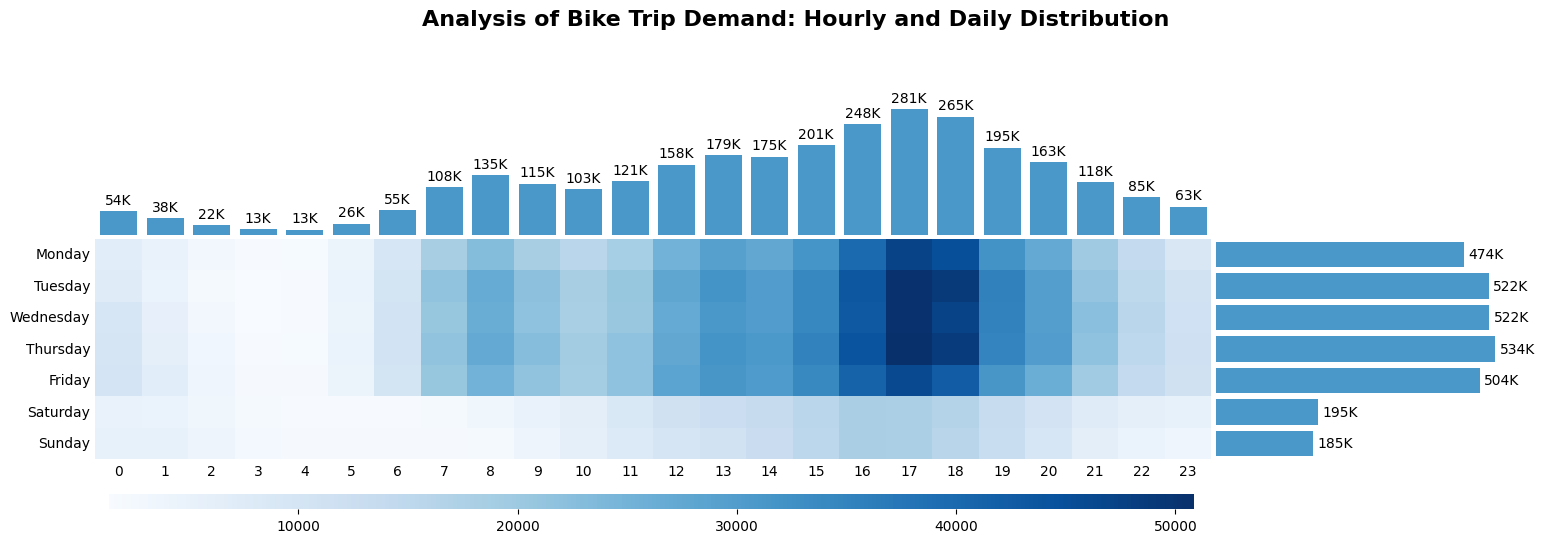

In [7]:
# ----------------------------
# Data Preparation
# ----------------------------
df_trips['fecha_origen_recorrido'] = pd.to_datetime(df_trips['fecha_origen_recorrido'], errors='coerce')
df_trips['day_of_week'] = df_trips['fecha_origen_recorrido'].dt.day_name()
df_trips['hour'] = df_trips['fecha_origen_recorrido'].dt.hour

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_trips['day_of_week'] = pd.Categorical(df_trips['day_of_week'], categories=days_order, ordered=True)

heatmap_data = df_trips.groupby(['day_of_week', 'hour'], observed=False).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(days_order)

hourly_totals = heatmap_data.sum(axis=0)
day_totals = heatmap_data.sum(axis=1)

bar_color = plt.cm.Blues(0.6)

# ----------------------------
# Figure Configuration
# ----------------------------
dpi = 100
fig = plt.figure(figsize=(14, 5), dpi=dpi)

fig_width_pixels = fig.get_figwidth() * dpi
fig_height_pixels = fig.get_figheight() * dpi

wspace = 10 / fig_width_pixels
hspace = 10 / fig_height_pixels

gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1.75], width_ratios=[4, 1],
                       hspace=hspace, wspace=wspace)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_ylim(ax1.get_ylim())

ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1], sharey=ax3)

# ----------------------------
# Plot 1: Vertical Bar Chart
# ----------------------------
x = np.arange(0, 24)
x_positions = x + 0.5
bar_width = 0.8
bars = ax1.bar(x_positions, hourly_totals.values, width=bar_width, color=bar_color, align='center')

ax1.set_xlim(0, 24)
ax1.set_xticks(x + 0.5)
ax1.get_yaxis().set_visible(False)
ax1.margins(0)

for spine in ax1.spines.values():
    spine.set_visible(False)

for bar in bars:
    height = bar.get_height()
    label = f'{height/1000:.0f}K'
    ax1.annotate(label,
                 xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

ax1.set_xticklabels([])

# ----------------------------
# Plot 2: Empty Subplot
# ----------------------------
ax2.axis('on')
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])

# ----------------------------
# Plot 3: Heatmap
# ----------------------------
cbar_ax = fig.add_axes([0.01, 0.05, 0.775, 0.03])

sns.heatmap(heatmap_data, cmap='Blues', cbar=True, cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"}, ax=ax3, linewidths=0)

ax3.set_xticks(x + 0.5)
ax3.set_xticklabels(x, rotation=0)
ax3.set_yticklabels(heatmap_data.index, rotation=0, va='center')

for spine in ax3.spines.values():
    spine.set_visible(False)
ax3.tick_params(axis='both', which='both', length=0)

# ----------------------------
# Plot 4: Horizontal Bar Chart
# ----------------------------
y_positions = ax3.get_yticks()
bars_h = ax4.barh(y=y_positions, width=day_totals.values, height=bar_width, color=bar_color, align='center')
ax4.margins(0)

for spine in ax4.spines.values():
    spine.set_visible(False)

ax4.tick_params(axis='y', labelleft=False)

for bar in bars_h:
    width = bar.get_width()
    label = f'{width/1000:.0f}K'
    ax4.annotate(label,
                 xy=(width, bar.get_y() + bar.get_height()/2),
                 xytext=(3, 0),
                 textcoords="offset points",
                 ha='left', va='center')

ax4.set_ylim(ax3.get_ylim())

# ----------------------------
# Remove Axis Labels
# ----------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel("")
    ax.set_ylabel("")

for ax in [ax1, ax2, ax4]:
    ax.tick_params(axis='both', which='both', colors=(0, 0, 0, 0), labelcolor=(0, 0, 0, 0))

# Add Title Above All Subplots
fig.suptitle("Analysis of Bike Trip Demand: Hourly and Daily Distribution", fontsize=16, fontweight='bold', y=1.05)

# Adjust Layout and Show Plot
plt.subplots_adjust(left=0, right=1, top=0.85, bottom=0.15)
plt.show()


**Analysis**

This chart shows that bike trip demand peaks late in the afternoon (roughly 4–8 PM), with Friday having the highest total number of trips among weekdays. Early morning hours (around 7–9 AM) also see increased activity on weekdays, suggesting a strong commuter pattern. Meanwhile, weekend totals are lower, indicating fewer rides overall on Saturdays and Sundays. The visual highlights a clear weekday vs. weekend difference, with demand heavily concentrated around typical commute times during the workweek.

## 4. Average Weekly Rides

- Calculate the average number of rides per week.


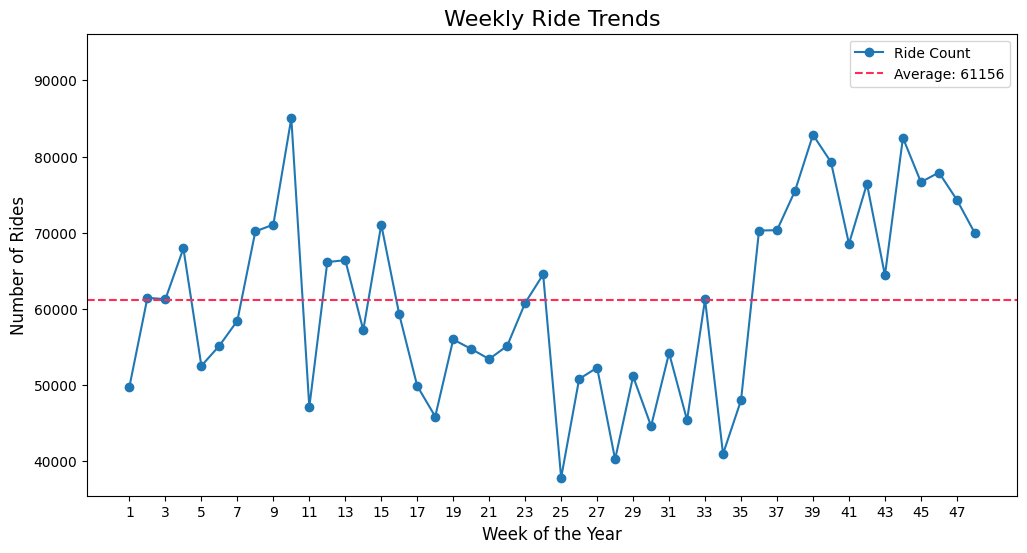

In [10]:
# Extract the week of the year and create a new column named 'week'
df_trips['week'] = df_trips['fecha_origen_recorrido'].dt.isocalendar().week

# Count the number of rides per week
rides_per_week = df_trips.groupby('week').size()

# Calculate the average number of rides per week
weekly_average = rides_per_week.mean()

# Create the plot
plt.figure(figsize=(12, 6))
# Plot the ride count curve
plt.plot(rides_per_week.index, rides_per_week.values, marker='o', linestyle='-', label='Ride Count')
# Plot the average line with the specified color, displaying the average without decimals
plt.axhline(weekly_average, color='#FF2D55', linestyle='--', label=f'Average: {weekly_average:.0f}')

# Configure x-axis ticks to be shown every 2 weeks
week_min, week_max = rides_per_week.index.min(), rides_per_week.index.max()
plt.xticks(np.arange(week_min, week_max + 1, 2))

# Add descriptive title and labels
plt.title('Weekly Ride Trends', fontsize=16)
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)

# Extend y-axis to create space for the legend
current_ylim = plt.ylim()
plt.ylim(current_ylim[0], current_ylim[1] * 1.1)

# Position the legend inside the plot (upper right)
plt.legend(loc='upper right')

plt.show()

## 5. Bike Redistribution

- Are there enough bikes at all stations?
- Should the government redistribute bikes?
- Justify any proposed redistribution.

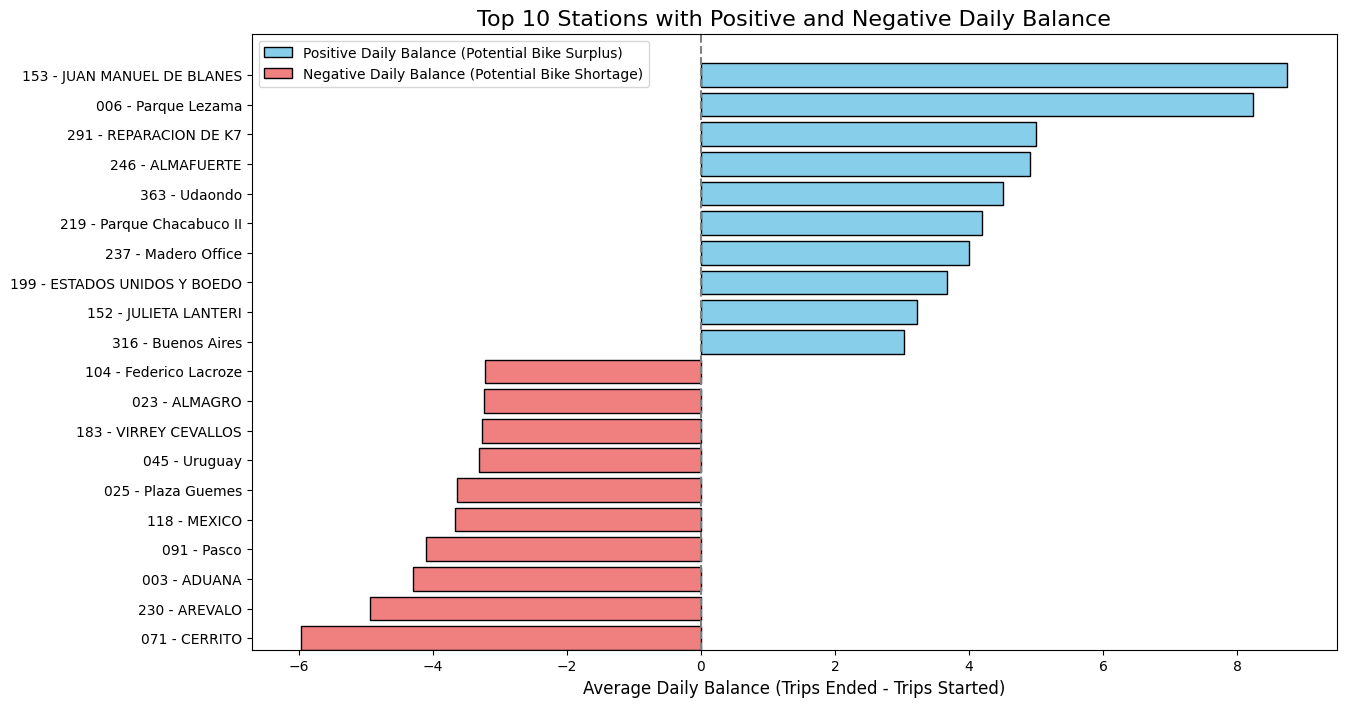

In [15]:
df_trips['date'] = df_trips['fecha_origen_recorrido'].dt.date
# --- Step 1: Calculate the daily number of trips started per station ---
daily_origin = df_trips.groupby(['date', 'nombre_estacion_origen']).size().reset_index(name='Trips_Started')
daily_origin = daily_origin.rename(columns={'nombre_estacion_origen': 'Station'})

# --- Step 2: Calculate the daily number of trips ended per station ---
daily_dest = df_trips.groupby(['date', 'nombre_estacion_destino']).size().reset_index(name='Trips_Ended')
daily_dest = daily_dest.rename(columns={'nombre_estacion_destino': 'Station'})

# --- Step 3: Combine the counts to get the daily balance for each station ---
daily_balance = pd.merge(daily_origin, daily_dest, on=['date', 'Station'], how='outer').fillna(0)
# Changed equation: now balance = Trips Ended - Trips Started
daily_balance['Daily_Balance'] = daily_balance['Trips_Ended'] - daily_balance['Trips_Started']

# --- Step 4: Calculate the average daily balance for each station ---
avg_daily_balance = daily_balance.groupby('Station')['Daily_Balance'].mean().reset_index(name='Avg_Daily_Balance')

# --- Step 5: Extract top 10 stations with positive and negative average daily balance ---
top_positive = avg_daily_balance[avg_daily_balance['Avg_Daily_Balance'] > 0].sort_values('Avg_Daily_Balance', ascending=False).head(10)
top_negative = avg_daily_balance[avg_daily_balance['Avg_Daily_Balance'] < 0].sort_values('Avg_Daily_Balance', ascending=True).head(10)

# Combine the two groups into one DataFrame
combined = pd.concat([top_positive, top_negative])

# Create a new column for color coding:
# Using skyblue for positive balance (potential bike surplus) and lightcoral for negative balance (potential bike shortage)
combined['Color'] = combined['Avg_Daily_Balance'].apply(lambda x: 'skyblue' if x > 0 else 'lightcoral')

# Sort combined data by average daily balance (descending) for plotting
combined = combined.sort_values('Avg_Daily_Balance', ascending=False)

# --- Step 6: Visualize the results in a single plot ---
plt.figure(figsize=(14, 8))
bars = plt.barh(combined['Station'], combined['Avg_Daily_Balance'], color=combined['Color'], edgecolor='black')
plt.xlabel('Average Daily Balance (Trips Ended - Trips Started)', fontsize=12)
plt.title('Top 10 Stations with Positive and Negative Daily Balance', fontsize=16)
plt.axvline(0, color='gray', linestyle='--')

# Invert y-axis to have the highest balance on top
ax = plt.gca()
ax.invert_yaxis()

# Extend the y-axis a bit to add margin so that the legend does not overlap the bars
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin - 1, ymax)

# Add a legend manually with the updated labels
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', edgecolor='black', label='Positive Daily Balance (Potential Bike Surplus)'),
    Patch(facecolor='lightcoral', edgecolor='black', label='Negative Daily Balance (Potential Bike Shortage)')
]
plt.legend(handles=legend_elements, loc='upper left')

plt.show()

- Positive Daily Balance: Stations with a positive average daily balance are those where more bikes are returned than taken. This indicates a surplus of bikes at these locations.
- Negative Daily Balance: Conversely, stations with a negative average daily balance have more bikes being taken than returned, signaling a potential shortage.

**Redistribution Justification:**
By transferring bikes from stations with a consistent surplus to those with a shortage, the system can better balance supply and demand. This strategic redistribution not only optimizes operational efficiency but also enhances the user experience by reducing the likelihood of empty docks in high-demand areas and preventing the clogging of stations with excess bikes

## 6. Ride Duration

- Calculate the average ride duration.

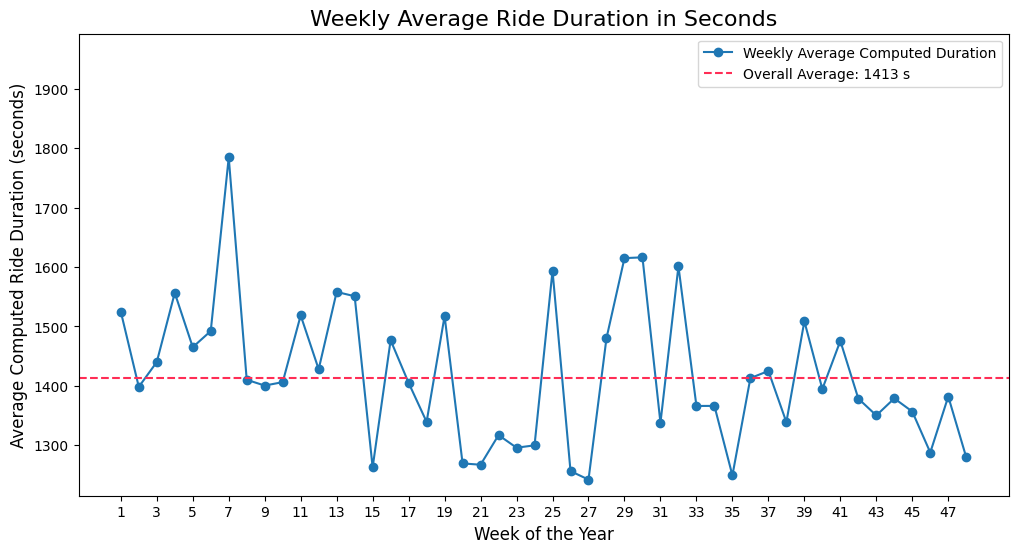

In [8]:
# Ensure both start and end date columns are in datetime format
df_trips['fecha_origen_recorrido'] = pd.to_datetime(df_trips['fecha_origen_recorrido'])
df_trips['fecha_destino_recorrido'] = pd.to_datetime(df_trips['fecha_destino_recorrido'])

# Compute the ride duration (in seconds) based on start and end times
df_trips['computed_duration'] = (df_trips['fecha_destino_recorrido'] - df_trips['fecha_origen_recorrido']).dt.total_seconds()

# Extract the week of the year from the start date
df_trips['week'] = df_trips['fecha_origen_recorrido'].dt.isocalendar().week

# Calculate the average computed duration per week (in seconds)
weekly_avg_duration_computed = df_trips.groupby('week')['computed_duration'].mean()

# Calculate the overall average computed duration (in seconds)
overall_avg_duration_computed = df_trips['computed_duration'].mean()

# Create the plot
plt.figure(figsize=(12, 6))
# Plot the weekly average computed duration curve
plt.plot(weekly_avg_duration_computed.index, weekly_avg_duration_computed.values, marker='o', linestyle='-', label='Weekly Average Computed Duration')
# Plot the overall average line (displayed without decimals)
plt.axhline(overall_avg_duration_computed, color='#FF2D55', linestyle='--', label=f'Overall Average: {overall_avg_duration_computed:.0f} s')

# Configure x-axis ticks to be shown every 2 weeks
week_min, week_max = weekly_avg_duration_computed.index.min(), weekly_avg_duration_computed.index.max()
plt.xticks(np.arange(week_min, week_max + 1, 2))

# Add descriptive title and labels
plt.title('Weekly Average Ride Duration in Seconds', fontsize=16)
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Average Computed Ride Duration (seconds)', fontsize=12)

# Extend y-axis to create space for the legend
current_ylim = plt.ylim()
plt.ylim(current_ylim[0], current_ylim[1] * 1.1)

# Position the legend inside the plot (upper right)
plt.legend(loc='upper right')

plt.show()

**Analysis**
From these results, it appears that ride durations exhibit a seasonal pattern, peaking in the summer months and dropping during the winter. However, this is only one perspective. Extending the analysis to include additional variables such as weather conditions, or user demographics—could offer deeper insights into the factors influencing ride duration and help confirm whether seasonality is the primary driver.

## 7. Mechanical Service Investment

- Where should the government place mechanical bike services?
- Justify the location choice with data.

In [17]:

df_filtered = df_trips.groupby('nombre_estacion_origen').size().reset_index(name='viajes')


# Get coordinates and total trips for the filtered stations
heat_data = []
for idx, row in df_filtered.iterrows():
    lat = df_trips[df_trips['nombre_estacion_origen'] == row['nombre_estacion_origen']]['lat_estacion_origen'].iloc[0]
    lon = df_trips[df_trips['nombre_estacion_origen'] == row['nombre_estacion_origen']]['long_estacion_origen'].iloc[0]
    trips = row['viajes']
    heat_data.append([lat, lon, trips])

# Calculate the average coordinates to center the map
avg_lat = df_trips['lat_estacion_origen'].mean()
avg_lon = df_trips['long_estacion_origen'].mean()

# Create the map centered at the average coordinates
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Add the HeatMap layer
HeatMap(heat_data, min_opacity=0.2, max_val=100, radius=25, blur=15, max_zoom=16).add_to(m)

# Create a MarkerCluster to group markers when zooming
marker_cluster = MarkerCluster().add_to(m)

# Add bicycle station markers to the cluster
for idx, row in df_filtered.iterrows():
    lat = df_trips[df_trips['nombre_estacion_origen'] == row['nombre_estacion_origen']]['lat_estacion_origen'].iloc[0]
    lon = df_trips[df_trips['nombre_estacion_origen'] == row['nombre_estacion_origen']]['long_estacion_origen'].iloc[0]
    trips = row['viajes']

    marker = folium.Marker(
        location=[lat, lon],
        popup=f"Station: {row['nombre_estacion_origen']}<br>Total Trips: {trips}",
        icon=Icon(color='blue', icon='bicycle', prefix='fa')  # Blue bicycle icon
    )
    marker.add_to(marker_cluster)

# Add markers for maintenance stations (df_mecanical_points)
for idx, row in df_mecanical_points.dropna(subset=['LAT', 'LNG']).iterrows():
    lat = row['LAT']
    lon = row['LNG']
    name = row['LUGAR']

    mec_marker = folium.Marker(
        location=[lat, lon],
        popup=f"Maintenance Station: {name}",
        icon=Icon(color='red', icon='wrench', prefix='fa')  # Red wrench icon
    )
    mec_marker.add_to(m)

# Save the map as an HTML file
m.save("mapa_estaciones_cluster_mantenimiento.html")

m

/tmp/ipykernel_10207/1251997756.py:20: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, min_opacity=0.2, max_val=100, radius=25, blur=15, max_zoom=16).add_to(m)


In [112]:
# --- Clean station IDs in df_trips by removing "BAEcobici" ---
df_trips['id_estacion_origen'] = df_trips['id_estacion_origen'].str.replace("BAEcobici", "", regex=False)
df_trips['id_estacion_destino'] = df_trips['id_estacion_destino'].str.replace("BAEcobici", "", regex=False)

# --- Convert latitude and longitude columns to numeric ---
df_bike_stations['LATITUD'] = pd.to_numeric(df_bike_stations['LATITUD'], errors='coerce')
df_bike_stations['LONGITUD'] = pd.to_numeric(df_bike_stations['LONGITUD'], errors='coerce')
df_mecanical_points['LAT'] = pd.to_numeric(df_mecanical_points['LAT'], errors='coerce')
df_mecanical_points['LNG'] = pd.to_numeric(df_mecanical_points['LNG'], errors='coerce')

# --- Convert df_bike_stations 'ID' column to string to match df_trips ---
df_bike_stations['ID'] = df_bike_stations['ID'].astype(str)

# --- Define the Haversine function to compute distance (in km) ---
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2)**2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# --- Function to compute the mechanical distance and nearest mechanical point ---
def distance_and_nearest_mech(row, mech_df):
    lat_station = row['LATITUD']
    lon_station = row['LONGITUD']
    min_distance = None
    nearest_point = None
    for _, mech_row in mech_df.dropna(subset=['LAT', 'LNG']).iterrows():
        d = haversine(lat_station, lon_station, mech_row['LAT'], mech_row['LNG'])
        if min_distance is None or d < min_distance:
            min_distance = d
            nearest_point = mech_row['LUGAR']
    return pd.Series({'min_distance_to_mech_km': min_distance, 'nearest_mech_point': nearest_point})

# --- Calculate mechanical distance and nearest mechanical point for each bike station ---
df_bike_stations[['min_distance_to_mech_km', 'nearest_mech_point']] = df_bike_stations.apply(
    lambda row: distance_and_nearest_mech(row, df_mecanical_points), axis=1
)

# --- Count total trips per origin station ---
trip_counts = df_trips.groupby('id_estacion_origen').size().reset_index(name='total_trips')

# --- Remove existing "total_trips" column if it exists to avoid duplicates ---
if 'total_trips' in df_bike_stations.columns:
    df_bike_stations = df_bike_stations.drop(columns=['total_trips'])

# --- Merge trip counts into df_bike_stations ---
df_bike_stations = df_bike_stations.merge(trip_counts, left_on='ID', right_on='id_estacion_origen', how='left')

# Replace NaN with 0 for stations with no trips and convert to integer
df_bike_stations['total_trips'] = df_bike_stations['total_trips'].fillna(0).astype(int)

# Optionally drop the extra merge column
df_bike_stations.drop(columns=['id_estacion_origen'], inplace=True, errors='ignore')

# --- Calculate Q3 for total_trips ---
q3 = df_bike_stations['total_trips'].quantile(0.75)

# --- Filter rows where min_distance_to_mech_km > 1.5 and total_trips > Q3 ---
filtered_df = df_bike_stations[
    (df_bike_stations['min_distance_to_mech_km'] > 1.5) &
    (df_bike_stations['total_trips'] > q3)
]

# --- Add the 'BARRIO' field (assuming it's present in df_bike_stations) ---
# --- Order by total_trips in descending order ---
filtered_df = filtered_df.sort_values('total_trips', ascending=False)

# --- Display the filtered table with selected columns ---
styled_table = filtered_df[['ID', 'NOMBRE', 'BARRIO', 'COMUNA', 'min_distance_to_mech_km', 'total_trips']].style.set_caption("Filtered Stations (min_distance > 1.5 km and total_trips > Q3)")
display(styled_table)




,ID,NOMBRE,BARRIO,COMUNA,min_distance_to_mech_km,total_trips
6,8,CONGRESO,MONSERRAT,COMUNA 1,1.543972,25875
83,130,RETIRO II,RETIRO,COMUNA 1,1.808568,24649
32,54,ACUÑA DE FIGUEROA,ALMAGRO,COMUNA 5,1.608443,19943
100,161,HUMAHUACA,ALMAGRO,COMUNA 5,1.525283,18487
15,25,PLAZA GÜEMES,PALERMO,COMUNA 14,1.577662,17083
44,69,ECUADOR,RECOLETA,COMUNA 2,1.597559,17062
118,183,VIRREY CEVALLOS,MONSERRAT,COMUNA 1,1.609034,16452
20,33,FACULTAD DE MEDICINA,RECOLETA,COMUNA 2,1.524754,16225
275,449,SAN JOSE DE FLORES,FLORES,COMUNA 7,2.108648,15881
42,66,BILLINGHURST,RECOLETA,COMUNA 2,1.871732,15676


**Advice**
Based on the heat map, we can observe a strong concentration of trips in two main areas: the Retiro zone (grouping stations such as RETIRO I, RETIRO II, and AV. DEL LIBERTADOR) and the Faculty of Medicine zone (with stations like Ecuador, HOSPITAL DE CLÍNICAS, and Facultad de Medicina). By performing distance calculations with a filter that considers only stations located more than 1.5 km away from their nearest mechanical point, and further filtering for stations with total trips above the 75th percentile of the distribution, I propose establishing new mechanical points in both zones. This strategy aims to reduce the distance to mecanical points in these high-activity areas, potentially improving service availability and overall system efficiency.

## 8. Additional Analysis

-  Explore any additional insights that may be valuable.

In [97]:
# -------------------------------
# Step 1: Prepare and filter user data
# -------------------------------

# Convert 'fecha_alta' in df_users_all to datetime (any unparseable dates become NaT)
df_users_all['fecha_alta'] = pd.to_datetime(df_users_all['fecha_alta'], errors="coerce")

# Filter to include only users who registered in 2024
df_users_2024_cohort = df_users_all[df_users_all['fecha_alta'].dt.year == 2024].copy()

# Create a 'cohort' column (registration month) using fecha_alta
df_users_2024_cohort['cohort'] = df_users_2024_cohort['fecha_alta'].dt.to_period('M')

# -------------------------------
# Step 2: Prepare trip data and merge with 2024 user cohort info
# -------------------------------

# Convert trip date in df_trips to datetime
df_trips['fecha_origen_recorrido'] = pd.to_datetime(df_trips['fecha_origen_recorrido'], errors="coerce")

# Ensure id_usuario in both DataFrames are strings for consistent merging
df_users_2024_cohort['id_usuario'] = df_users_2024_cohort['id_usuario'].astype(str)
df_trips['id_usuario'] = df_trips['id_usuario'].astype(str)

# Merge trips with the 2024 user cohort information.
# Using inner join ensures we only include trips for users who registered in 2024.
users_cohort = df_users_2024_cohort[['id_usuario', 'fecha_alta', 'cohort']]
df_trips_merged = pd.merge(df_trips, users_cohort, on='id_usuario', how='inner')

# -------------------------------
# Step 3: Calculate trip month and cohort index
# -------------------------------

# Determine the month (as a Period) in which the trip occurred
df_trips_merged['trip_month'] = df_trips_merged['fecha_origen_recorrido'].dt.to_period('M')

# Calculate the cohort index as the number of months elapsed between the registration month (cohort) and the trip month.
df_trips_merged['cohort_index'] = (
    (df_trips_merged['trip_month'].dt.to_timestamp() - df_trips_merged['cohort'].dt.to_timestamp())
    .apply(lambda x: x.days // 30)
)

# -------------------------------
# Step 4: Build the retention data
# -------------------------------

# For each cohort and cohort_index, count the number of unique users who took at least one trip.
cohort_data = df_trips_merged.groupby(['cohort', 'cohort_index'])['id_usuario'].nunique().reset_index()

# Calculate the total number of users in each 2024 cohort
cohort_size = df_users_2024_cohort.groupby('cohort')['id_usuario'].nunique().reset_index()
cohort_size.rename(columns={'id_usuario': 'cohort_size'}, inplace=True)

# Merge the cohort sizes into the cohort_data
cohort_data = pd.merge(cohort_data, cohort_size, on='cohort')

# Create a new column 'value':
# - For cohort_index == 0: use the raw count (number of new users)
# - For cohort_index > 0: compute the retention rate (unique users in that month / total cohort size)
cohort_data['value'] = cohort_data['id_usuario'] / cohort_data['cohort_size']

# -------------------------------
# Step 5: Create and format the retention matrix
# -------------------------------

# Pivot the data so that rows are cohorts and columns are months elapsed (cohort_index)
retention_matrix = cohort_data.pivot(index='cohort', columns='cohort_index', values='value')

# Format the results:
# - Column 0 (month 0) is displayed as an integer (new user count)
# - Other columns are displayed as percentages
formatted_retention = retention_matrix.copy()
for col in formatted_retention.columns:
        formatted_retention[col] = formatted_retention[col].apply(lambda x: "{:.0%}".format(x) if pd.notnull(x) else "")
display(formatted_retention)


cohort_index,0,1,2,3,4,5,6,7,8,9,10
cohort,,,,,,,,,,,
2024-01,64%,18%,13%,9%,7%,7%,7%,6%,8%,7%,6%
2024-02,64%,,14%,11%,9%,8%,8%,9%,9%,8%,
2024-03,66%,20%,12%,10%,9%,8%,10%,9%,8%,,
2024-04,63%,19%,14%,11%,10%,12%,11%,10%,,,
2024-05,59%,21%,15%,13%,14%,13%,11%,,,,
2024-06,65%,16%,12%,13%,12%,10%,,,,,
2024-07,63%,16%,13%,11%,10%,,,,,,
2024-08,63%,23%,16%,14%,,,,,,,
2024-09,66%,23%,15%,,,,,,,,


**Conclusion**
The retention matrix indicates that in the registration month (Month 0), only about 60–66% of users are active by making at least one trip. This suggests that a significant portion, roughly one-third, of new users do not engage with the service immediately upon registration, highlighting a potential area for improvement in the initial onboarding and activation process. Moreover, user activity declines significantly in the months following registration, which strongly suggests the need to implement retention campaigns aimed at keeping these users engaged after their initial activation.

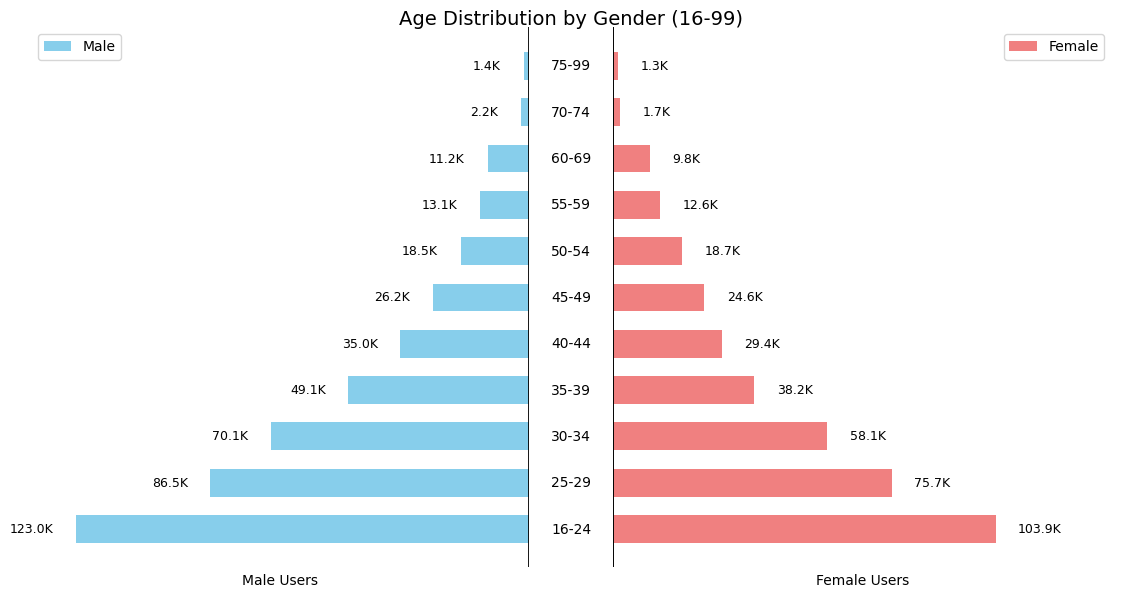

In [154]:
# Data preparation: filter users aged 16 to 99 and create custom age bins
df_users_all['edad_usuario'] = pd.to_numeric(df_users_all['edad_usuario'], errors='coerce')
df_users_all = df_users_all[(df_users_all['edad_usuario'] >= 16) & (df_users_all['edad_usuario'] <= 99)]
bins = [16, 25, 30, 35, 40, 45, 50, 55, 60, 70, 75, 100]
labels = ["16-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-69", "70-74", "75-99"]
df_users_all['age_range'] = pd.cut(df_users_all['edad_usuario'], bins=bins, labels=labels, right=False)

# Group by age_range and gender, explicitly passing observed=False to suppress the FutureWarning
grouped = df_users_all.groupby(['age_range', 'genero_usuario'], observed=False).size().unstack(fill_value=0)
male_counts = grouped['MALE'] if 'MALE' in grouped.columns else pd.Series(0, index=grouped.index)
female_counts = grouped['FEMALE'] if 'FEMALE' in grouped.columns else pd.Series(0, index=grouped.index)

index = np.arange(len(grouped.index))
global_max = max(male_counts.max(), female_counts.max())

# Create three subplots: left (male), center (age labels), right (female)
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.1, 1], wspace=0.05)
fig = plt.figure(figsize=(12, 6))
ax_left = plt.subplot(gs[0])
ax_center = plt.subplot(gs[1])
ax_right = plt.subplot(gs[2])

# Left chart: Male bars (start at 0 and extend left as negative values)
bars_male = ax_left.barh(index, -male_counts, left=0, height=0.6, color='skyblue', label='Male')
ax_left.axvline(0, color='black', linewidth=2, zorder=3)
ax_left.set_xlim([-global_max * 1.1, 0])
ax_left.set_yticks(index)
ax_left.set_yticklabels([])  # age labels in the center
ax_left.set_xlabel("Male Users")
ax_left.spines['top'].set_visible(False)
ax_left.spines['right'].set_visible(False)
ax_left.spines['bottom'].set_visible(False)
ax_left.spines['left'].set_visible(False)
ax_left.tick_params(left=False, bottom=False)
ax_left.legend(loc='upper left')
ax_left.set_xticks([])  # hide x-axis labels

# Add data labels for each male bar (in thousands with 1 decimal if >=1000)
for i, count in enumerate(male_counts):
    if count >= 1000:
        label_text = f"{count/1000:.1f}K"
    else:
        label_text = f"{int(count)}"
    ax_left.text(-count - (0.05 * global_max), i, label_text, va='center', ha='right', fontsize=9, color='black')

# Center chart: Age range labels
ax_center.set_xlim(0, 1)
ax_center.set_ylim(ax_left.get_ylim())
ax_center.axis('off')
for i, label in enumerate(grouped.index):
    ax_center.text(0.5, i, str(label), ha='center', va='center', fontsize=10, color='black')

# Right chart: Female bars (start at 0 and extend right as positive values)
bars_female = ax_right.barh(index, female_counts, left=0, height=0.6, color='lightcoral', label='Female')
ax_right.axvline(0, color='black', linewidth=0.7, zorder=3)
ax_right.set_xlim([0, global_max * 1.1])
ax_right.set_yticks([])
ax_right.set_xlabel("Female Users")
ax_right.spines['top'].set_visible(False)
ax_right.spines['right'].set_visible(False)
ax_right.spines['bottom'].set_visible(False)
ax_right.spines['left'].set_visible(False)
ax_right.tick_params(left=False, bottom=False)
ax_right.legend(loc='upper right')
ax_right.set_xticks([])  # hide x-axis labels

# Add data labels for each female bar (in thousands with 1 decimal if >=1000)
for i, count in enumerate(female_counts):
    if count >= 1000:
        label_text = f"{count/1000:.1f}K"
    else:
        label_text = f"{int(count)}"
    ax_right.text(count + (0.05 * global_max), i, label_text, va='center', ha='left', fontsize=9, color='black')

fig.suptitle("Age Distribution by Gender (16-99)", fontsize=14)
# Instead of tight_layout, use subplots_adjust to avoid compatibility issues
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()




## 9. Data Model Improvement

- Current datasets do not allow user retention tracking (no `user_id` field).
- What changes would you recommend for better retention analysis?
- Suggest KPIs to help achieve the 18% increase goal.

**What changes would you recommend for better retention analysis?**

Segmenting users further can provide deeper insights into retention dynamics by breaking down the overall cohort into more granular subgroups. For example, analyzing retention across different demographics such as age, gender, or location can help reveal if certain groups are more likely to remain active. Similarly, segmenting by acquisition channels—whether users joined through organic search, paid advertising, or referrals—can uncover which channels yield more loyal users.

**Suggest KPIs to help achieve the 18% increase goal.**
To help achieve an 18% increase, several KPIs can be tracked to provide a comprehensive view of user engagement and retention. For example, monitoring monthly and cohort retention rates will reveal the percentage of users who remain active over time, while tracking churn rate will help identify the rate at which users drop off.  Other important KPIs include daily and weekly active users, which reflect overall engagement, and session metrics like frequency and duration that indicate how often and how deeply users interact with the service. Lastly, financial metrics such as customer lifetime value and average revenue per user ensure that improvements in retention are translating into tangible business value. These KPIs together can inform targeted strategies to boost user engagement and retention, thereby supporting the 18% increase goal.

## 10. Feature Suggestion

- The app currently shows available bikes at stations.
- What feature would improve the user experience?
- What additional data should be tracked and why?

<span style="font-size:200%; font-weight:bold;">Feature Suggestions</span>

**Estimated Wait Time:**
Predicts how long a user might need to wait for a bike to become available at a station. This estimation would be based on historical data, including time-of-day, day-of-week, and past bike availability trends, thereby helping users plan their trips more efficiently and enhancing overall satisfaction with the bike-sharing service.

**Bike Reservation:**
Introduce a premium plan that allows users to reserve a bike for a short period, such as 10 minutes, ensuring bike availability when needed. This reservation system would enhance user convenience, reduce uncertainty at high-demand stations, and drive increased revenue through a subscription model.

**Waze Integration:**
Integrate the app with Waze to provide users with optimal route recommendations based on real-time traffic conditions. This feature would dynamically adjust suggested bike routes and travel times, ensuring smoother and faster trips by avoiding congested areas.

<span style="font-size:200%; font-weight:bold;">Data That Should Be Tracked</span>

**Real-Time GPS Tracking:**  Record each bike's GPS coordinates with precise timestamps to reconstruct full routes, analyze usage patterns, and calculate speeds and travel times.

**Station Capacity Field:**  Introducing a field that records the total capacity for each bike station would enable a more accurate assessment of station performance by comparing current bike availability against maximum capacity. This helps identify stations that are either operating at full capacity or frequently underutilized, allowing for more effective redistribution strategies and improved service reliability.

**Transactional Data Tracking for Bike Redistribution:**  Implement a system that records all transactional details of bike redistribution events, including timestamps, origin and destination stations, the number of bikes moved, and contextual information such as the reason for the move. Unifying this data facilitates comprehensive analysis of redistribution operations, enabling data-driven optimization of rebalancing strategies and ensuring operational decisions are well-informed by historical trends.

**Bike-Level Information:**  Detailed individual bike information is crucial for enhancing system performance and reliability. Recording each bike's unique identifier and model allows operators to monitor usage patterns and compare performance across models. Additionally, tracking maintenance and service history, along with usage frequency and mileage, enables proactive scheduling of repairs and replacements, ensuring that overused bikes receive timely attention and underused ones are reallocated as needed.
